<a href="https://colab.research.google.com/github/divyuk/machine-learning/blob/main/Simple_Linear_regressor_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =pd.read_csv('/content/Advertising.csv')

So we have three feature but we are building simple linear regressor, hence we need to get rid of 2 feartures or we can combine those

In [6]:
df['total_spent'] = df['radio'] + df['newspaper'] + df['TV']
df.head()

,TV,radio,newspaper,sales,total_spent
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


We will try to find the relation between total_spent and sales

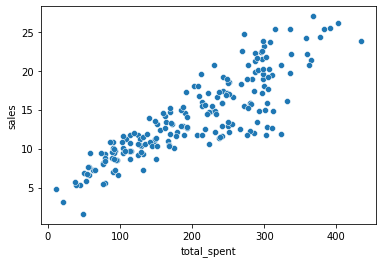

In [12]:
sns.scatterplot(data=df,x='total_spent',y='sales')

The trend seems to linear. A positive trend between the amount of sales done and the sales happened.

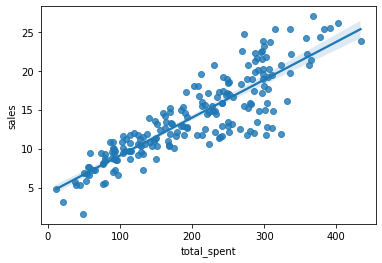

In [14]:
sns.regplot(data=df,x='total_spent',y='sales') #Since this is a simple linear regression, the seaborn plotted the best fit line using OLS

In [15]:
X = df['total_spent']
y = df['sales']

In [17]:
help(np.polyfit) # y = mx + b --> polyfit will return coeff

Help on function polyfit in module numpy:

polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
    Least squares polynomial fit.
    
    .. note::
       This forms part of the old polynomial API. Since version 1.4, the
       new polynomial API defined in `numpy.polynomial` is preferred.
       A summary of the differences can be found in the
       :doc:`transition guide </reference/routines.polynomials>`.
    
    Fit a polynomial ``p(x) = p[0] * x**deg + ... + p[deg]`` of degree `deg`
    to points `(x, y)`. Returns a vector of coefficients `p` that minimises
    the squared error in the order `deg`, `deg-1`, ... `0`.
    
    The `Polynomial.fit <numpy.polynomial.polynomial.Polynomial.fit>` class
    method is recommended for new code as it is more stable numerically. See
    the documentation of the method for more information.
    
    Parameters
    ----------
    x : array_like, shape (M,)
        x-coordinates of the M sample points ``(x[i], y[i])``.
    y : array_

In [18]:
np.polyfit(X,y,deg=1)

array([0.04868788, 4.24302822])

In [19]:
potential_spent = np.linspace(0,500,100)

In [20]:
predicted_sales = 0.04868788 * potential_spent + 4.24302822

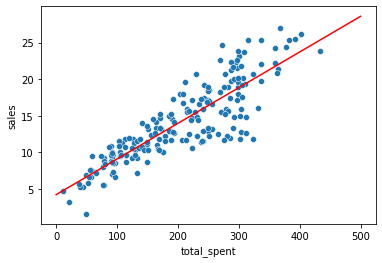

In [23]:
sns.scatterplot(data=df,x='total_spent',y='sales')
plt.plot(potential_spent , predicted_sales, color='red')

Creating the model from scratch

In [26]:
#1) The data set is loaded 
#2) Create the hypothesis
#3) Create Cost func
#4) Apply gradient 
#5) Min the gradient
#6) Return the coefficient values

In [64]:
x1 = X
y1 = y
arr = x1.values
x1 = arr.reshape((200,1))
arr2 = y1.values
y1 = arr.reshape((200,1))

In [76]:
def h(beta):
  return np.matmul(beta,x1.T)

In [77]:
def cost_fun(beta):
  return (  ( h(beta) - y1).T @ (h(beta) - y1) )/2*y1.shape[0]

In [78]:
def gradient_descent(beta, learning_rate = 0.1 , epochs=10):

  m = y1.shape[0]

  cost = []

  for _ in range(epochs):
    hx = h(beta)
    grad = (1/m) * (x1.T @(hx-y1))
    beta = beta - learning_rate * grad
    cost.append(cost_fun(beta))

  return beta , cost

In [79]:
def plot_data(x, y):
	plt.xlabel('Total spent')
	plt.ylabel('sales')
	plt.plot(x[:,0], y, 'bo')
	plt.show()

In [80]:
def plot_cost(J_all, num_epochs):
	plt.xlabel('Epochs')
	plt.ylabel('Cost')
	plt.plot(num_epochs, J_all, 'm', linewidth = "5")
	plt.show()

In [81]:
X.shape

(200,)

In [82]:
y.shape

(200,)

In [83]:
x1.shape

(200, 1)

In [84]:
beta = np.zeros((2, 1))
learning_rate = 0.1
num_epochs = 50
beta, J_all = gradient_descent( beta, learning_rate, num_epochs)
J = cost_fun(beta)
print("Cost: ", J)
print("Parameters: ", beta)

#for testing and plotting cost 
n_epochs = []
jplot = []
count = 0
for i in J_all:
	jplot.append(i[0][0])
	n_epochs.append(count)
	count += 1
jplot = np.array(jplot)
n_epochs = np.array(n_epochs)
plot_cost(jplot, n_epochs)

ValueError: ignored